# Introduction to PyTorch

[PyToch documentation](https://pytorch.org/docs/stable/index.html)


In [81]:
# imports for this lesson
import os
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## Tensors

In [7]:
# from list to tensor
x = [[1, 2],[3, 4]]
x_tensor = torch.tensor(x)
x_tensor

tensor([[1, 2],
        [3, 4]])

In [10]:
# from np.array to tensor
x_array = np.array(x)
x_tensor = torch.from_numpy(x_array)
x_tensor

tensor([[1, 2],
        [3, 4]])

In [12]:
# ones tensor with the same shape of x_tensor
x_ones = torch.ones_like(x_tensor)
x_ones

tensor([[1, 1],
        [1, 1]])

In [13]:
# random tensor with the same shape of x_tensor
x_rand = torch.rand_like(x_tensor, dtype=torch.float)
x_rand

tensor([[0.4469, 0.3094],
        [0.2159, 0.2610]])

In [16]:
# build tensors of a given shape
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9551, 0.4829, 0.3578],
        [0.8351, 0.4303, 0.2209]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [18]:
# tensor attributes
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operations on Tensors

In [19]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [25]:
tensor = torch.arange(12).reshape((3,4))
print(f"Tensor: {tensor}")
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[:, -1]}")
tensor[:,1] = 0
print(tensor)

Tensor: tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
First row: tensor([0, 1, 2, 3])
First column: tensor([0, 4, 8])
Last column: tensor([ 3,  7, 11])
tensor([[ 0,  0,  2,  3],
        [ 4,  0,  6,  7],
        [ 8,  0, 10, 11]])


In [29]:
# concatenate tensor
conc_tensor = torch.cat([tensor, tensor, tensor], dim=1)
conc_tensor

tensor([[ 0,  0,  2,  3,  0,  0,  2,  3,  0,  0,  2,  3],
        [ 4,  0,  6,  7,  4,  0,  6,  7,  4,  0,  6,  7],
        [ 8,  0, 10, 11,  8,  0, 10, 11,  8,  0, 10, 11]])

In [35]:
# tensor multiplication (syntactic sugar)
t1 = tensor @ tensor.T
# tensor multiplication (explicit formulation)
t2 = tensor.matmul(tensor.T)
print(t1,t2) 

# element-wise product (syntactic sugar)
e1 = tensor * tensor
# element-wise product (explicit formulation)
e2 = tensor.mul(tensor)
print(e1,e2)

tensor([[ 13,  33,  53],
        [ 33, 101, 169],
        [ 53, 169, 285]]) tensor([[ 13,  33,  53],
        [ 33, 101, 169],
        [ 53, 169, 285]])
tensor([[  0,   0,   4,   9],
        [ 16,   0,  36,  49],
        [ 64,   0, 100, 121]]) tensor([[  0,   0,   4,   9],
        [ 16,   0,  36,  49],
        [ 64,   0, 100, 121]])


### Bridge with NumPy 

In [39]:
# from tensor to numpy
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [40]:
# changing the tensor will also change its numpy counterpart
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


## Automatic differentiation

In [79]:
# one-layer nn using torch

# input tensor
x = torch.ones(5)
# expected output
y = torch.zeros(3) 
# weigths def
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [80]:
loss.backward()
# compute the partial derivative of the loss w.r.t. w
print(w.grad)
# compute the partial derivative of the loss w.r.t. b
print(b.grad)

tensor([[0.1978, 0.0950, 0.2057],
        [0.1978, 0.0950, 0.2057],
        [0.1978, 0.0950, 0.2057],
        [0.1978, 0.0950, 0.2057],
        [0.1978, 0.0950, 0.2057]])
tensor([0.1978, 0.0950, 0.2057])


## Loading the FashionMNIST dataset

In [82]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

0.2%

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




28.2%

100.0%
100.0%

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



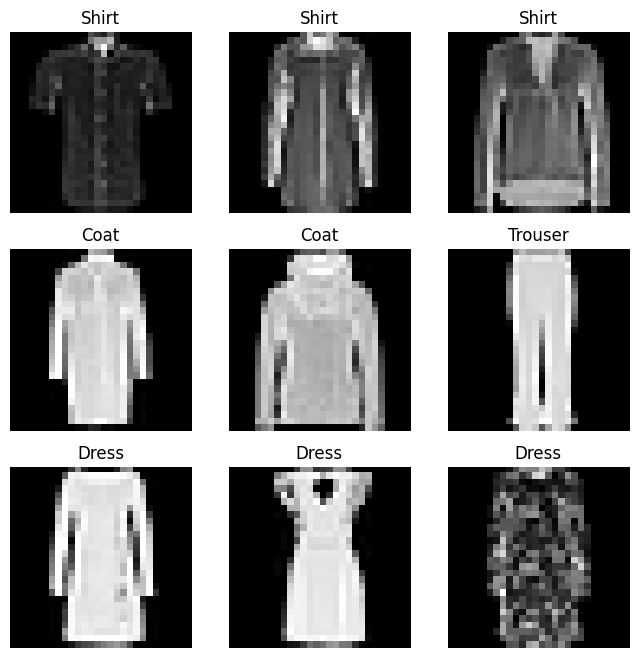

In [88]:
# plot 9 random sample of the training set
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Data Loaders

In [89]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Build a Neural Network

In [44]:
# set the device for the training
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [50]:
# Neural Network class for the FashionMNIST dataset (inherited class with parent nn.Module)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [48]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [49]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([9], device='cuda:0')


### `nn.Flatten`

`nn.Flatten` convert each $28 \times 28$ tensor in a contigous array of length $28^2 = 784$.

In [51]:
input_image = torch.rand(3,28,28)
print(input_image.size())

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 28, 28])
torch.Size([3, 784])


### `nn.Linear`

`nn.Linear` apply a linear transformation to the input using the stored weights and bias.

In [52]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


### `nn.ReLU`

`nn.ReLU` is the ReLU activation function for each layer.

In [53]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-4.4426e-01, -6.2140e-02,  1.6103e-01, -4.0152e-01, -2.2100e-01,
          2.6668e-02, -1.0472e-01, -2.8304e-01,  5.0291e-01,  1.4937e-01,
          5.6406e-01,  2.4710e-01, -1.1867e-01, -2.6820e-01, -3.1990e-01,
         -1.0631e-01,  5.6750e-02, -4.9908e-01, -2.5435e-01,  3.3812e-01],
        [-2.6382e-01, -2.9852e-01,  4.0189e-01, -4.6117e-01,  4.3404e-01,
         -2.8799e-01, -2.3808e-01, -5.4558e-01, -2.0218e-02, -2.5795e-01,
          2.4061e-01,  2.0398e-01,  5.5116e-02, -4.3963e-01, -4.4164e-01,
         -3.7840e-01, -3.0664e-02, -4.1459e-01, -2.1213e-01,  1.3304e-01],
        [-1.0114e-01, -2.9718e-01,  2.2003e-01, -5.3684e-01, -7.6582e-03,
         -1.0618e-01, -2.6521e-01, -3.2382e-01,  2.3865e-01, -3.3744e-02,
          2.1313e-01,  9.0022e-02,  4.9023e-04,  4.6915e-02, -3.9160e-01,
         -1.4517e-01, -2.9534e-02, -3.7701e-01, -4.2025e-01,  2.9883e-01]],
       grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000e+00, 0.0000e+00, 1.6103e-01, 0.0

### `nn.Sequential`

`nn.Sequential` is just a container of different modules. The data are passed forward, hence passing each module contained.

In [55]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
logits

tensor([[-0.2212,  0.1408, -0.1180, -0.0332, -0.1479, -0.1010,  0.1352, -0.2569,
         -0.1287,  0.1925],
        [-0.1194,  0.2678,  0.0167, -0.0991, -0.1443, -0.1523,  0.0398, -0.1295,
         -0.1041,  0.2071],
        [-0.2160,  0.2090, -0.0270, -0.0616, -0.0649, -0.1720,  0.1037, -0.2356,
         -0.1399,  0.1836]], grad_fn=<AddmmBackward0>)

### `nn.Softmax`

Citing PyTorch docs, "applies the Softmax function to an $n$-dimensional input Tensor rescaling them so that the elements of the $n$-dimensional output Tensor lie in the range $[0,1]$ and sum to $1$."

In [61]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
# predicted classes
pred_probab.argmax(1)

tensor([9, 1, 1])

## Optimization loop

In [94]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [95]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients 
    # are computed during test mode and also serves to reduce unnecessary 
    # gradient computations and memory usage for tensors with requires_grad = True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [96]:
model = NeuralNetwork()
learning_rate = 1e-3
batch_size = 64

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.290259  [   64/60000]
loss: 2.289997  [ 6464/60000]
loss: 2.282045  [12864/60000]
loss: 2.247483  [19264/60000]
loss: 2.246157  [25664/60000]
loss: 2.230678  [32064/60000]
loss: 2.218587  [38464/60000]
loss: 2.188747  [44864/60000]
loss: 2.170841  [51264/60000]
loss: 2.151499  [57664/60000]
Test Error: 
 Accuracy: 42.5%, Avg loss: 2.162296 

Epoch 2
-------------------------------
loss: 2.162414  [   64/60000]
loss: 2.131241  [ 6464/60000]
loss: 2.152310  [12864/60000]
loss: 2.113808  [19264/60000]
loss: 2.063272  [25664/60000]
loss: 2.068116  [32064/60000]
loss: 2.008269  [38464/60000]
loss: 1.976749  [44864/60000]
loss: 1.974887  [51264/60000]
loss: 1.901383  [57664/60000]
Test Error: 
 Accuracy: 55.1%, Avg loss: 1.901701 

Epoch 3
-------------------------------
loss: 1.896375  [   64/60000]
loss: 1.861433  [ 6464/60000]
loss: 1.772154  [12864/60000]
loss: 1.761452  [19264/60000]
loss: 1.817092  [25664/60000]
loss: 1.757015  [32064/600